### Importing the necessary libraries

In [9]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# path to a mock song
path = './Input Data/Data/Other/Carry On Wayward Son by Kansas - Isolated Keyboard Track.mp3.wav'

#### Loading the song as a floating point time series using librosa, returning it as a numpy array

In [3]:
song,sample_rate = librosa.load(path)

In [25]:
print(song.shape,'\n', type(song))

(6745088,) 
 <class 'numpy.ndarray'>


#### We compute the envelope of the signal by choosing the maximal value of a given frame (the input wave is split into frames) and adding them to a list of envelope values

In [5]:
def amplitude_envelope_calculator(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [11]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
ae = amplitude_envelope_calculator(song, FRAME_SIZE, HOP_LENGTH)

In [12]:
frames = range(len(ae))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

[0. 0. 0. ... 0. 0. 0.]


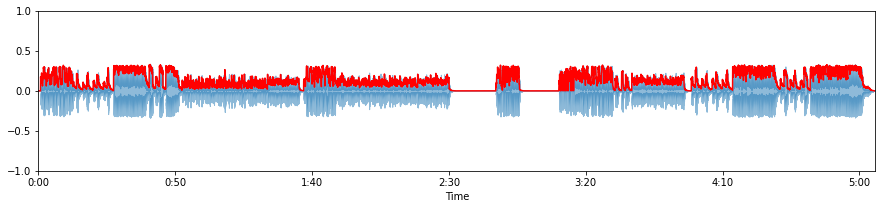

In [15]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(song, alpha=0.5)
plt.plot(t, ae, color="r")
plt.ylim((-1, 1))
plt.show()